TLDR: Jump to [Main implementation](#main-implementation)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [99]:
def generate_pixel_circle(radius):
    grid_size = radius * 2 + 1
    z = np.zeros((grid_size, grid_size))
    n = len(z)
    m = len(z[0])

    center_x = n // 2
    center_y = m // 2

    I, J = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))

    # calculate distance of all points to centre
    dist = np.sqrt((I - center_x) ** 2 + (J - center_y) ** 2)

    # Assign value of 1 to those points where dist<radius:
    z[np.where(dist < radius)] = 1

    return z

In [100]:
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.pcolormesh(matrix)
    ax.set_aspect("equal")
    plt.axis("off")
    plt.tight_layout()

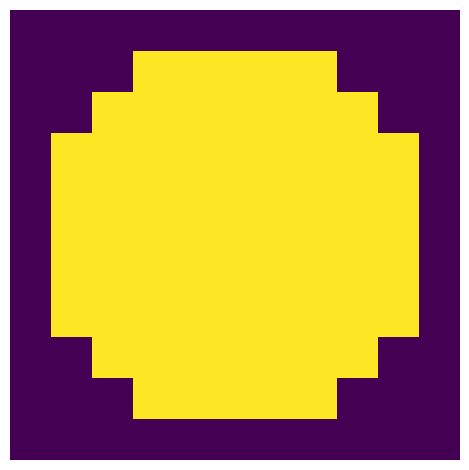

In [101]:
plot_matrix(generate_pixel_circle(5))

### Generate masks

Following cell simply creates 5 different matrices with a single pixel turned on.

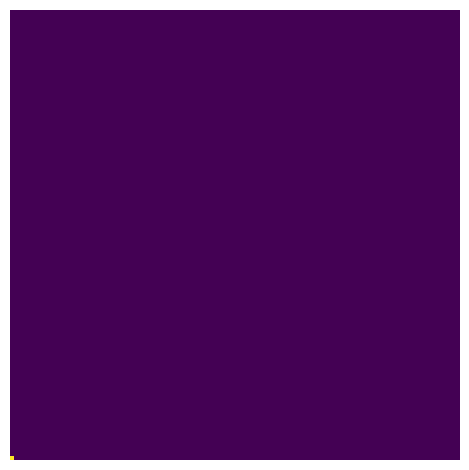

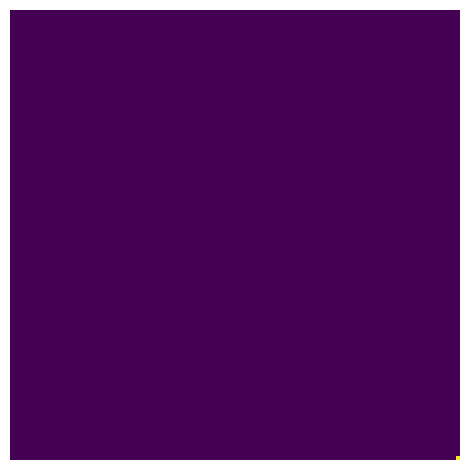

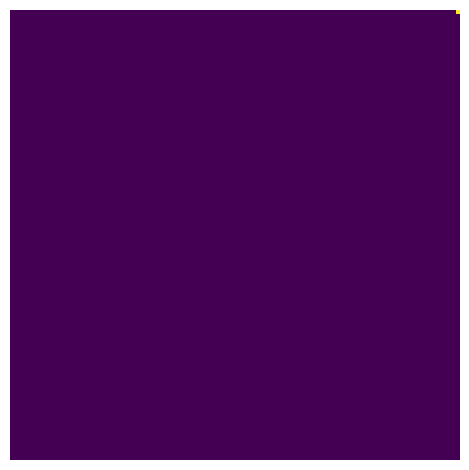

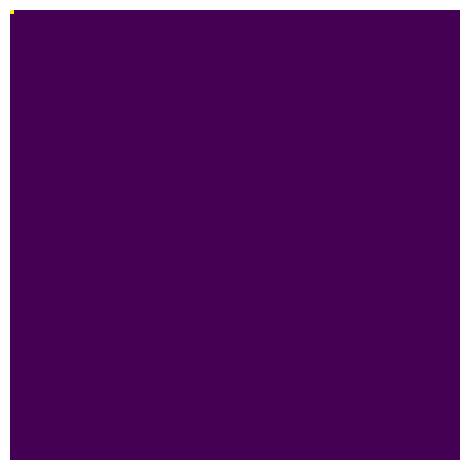

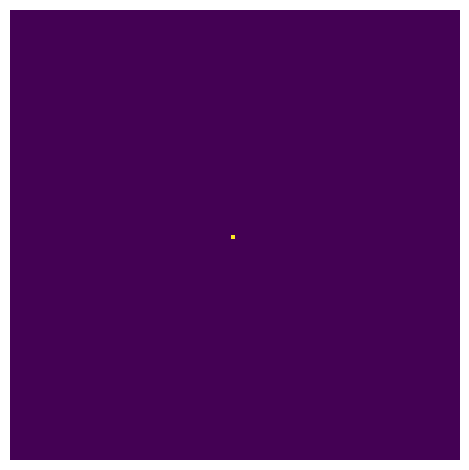

In [118]:
base_zeros_matrix = np.zeros((112, 112))

channels = []
channel_points = [(0, 0), (0, 111), (111, 111), (111, 0), (55, 55)]

for point in channel_points:
    x, y = point
    new_channel = deepcopy(base_zeros_matrix)
    new_channel[x][y] = 1
    plot_matrix(new_channel)

    channels.append(new_channel)

### Expanding algorithm

Takes in a `matrix` that is expected to only have one single pixel turned on, there fore it also takes and `x` and `y` values of its position.

It also takes in the desired expansion value as an integer.

The process is to generate a simple matrix of zeros with a pixelated circle of ones built from the center of the desired radius, this matrix is known as a `kernel`.

It then aligns said `kernel` to the only turned on pixel from the original matrix. Once it aligns it it goes through the kernel and makes an OR bitwise operation to merge both matrices.

In [112]:
def expand_pixel(matrix, x, y, expansion_radius=5):
    kernel = generate_pixel_circle(expansion_radius)

    # Get coordinates to align both matrices
    center_x, center_y = x, y
    start_x = center_x - kernel.shape[0] // 2
    start_y = center_y - kernel.shape[1] // 2
    new_matrix = np.zeros_like(matrix, dtype=bool)
    height, width = matrix.shape

    for i in range(len(kernel)):
        for j in range(len(kernel[0])):
            px, py = start_x + i, start_y + j
            if 0 <= px < height and 0 <= py < width:
                new_matrix[px][py] = np.logical_or(matrix[px][py], kernel[i][j])

    return new_matrix

## Main implementation

In the following I use a list of matrixes (`channels`). This matrices are each image channel with a single pixel turned on on each.

There is also a list of tuples (`channel_points`), representing points that belong to the `x` and `y` coordinates of the turned on pixel on each matrix.

It is crutial that the index of a certain matrix on `channels`, matches with its corresponding pixel on `channel_points`


### Direct implementation

In [119]:
new_channels = []

for chan, points in zip(channels, channel_points):
    new_channels.append(expand_pixel(chan, points[0], points[1], 10))

### Just plotting

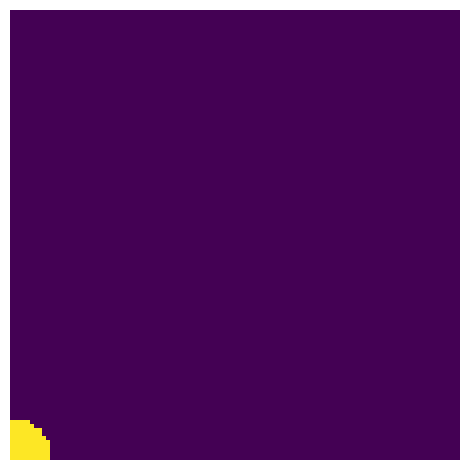

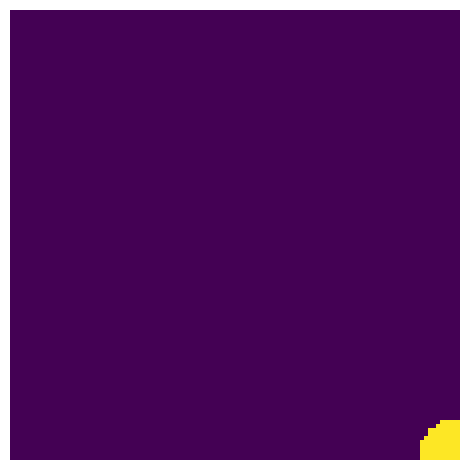

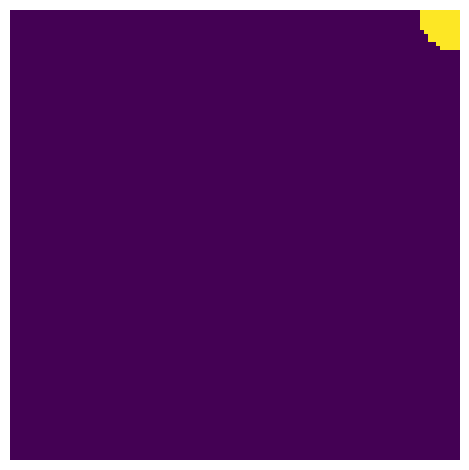

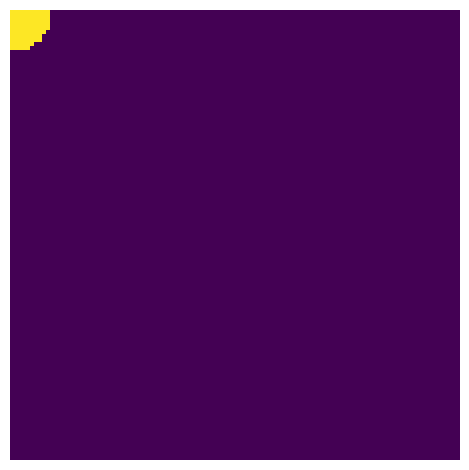

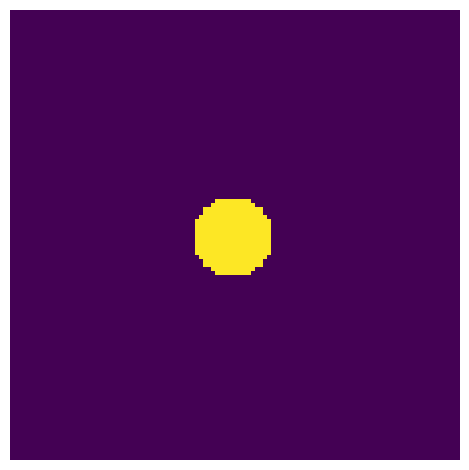

In [120]:
for chan in new_channels:
    plot_matrix(chan)